<a href="https://colab.research.google.com/github/Anshikapal05/ML/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction (Regression)**

Concepts learned:

1.   Data cleaning
2.   Feature selection
3.   Train–test split
4.   Linear Regression


In [ ]:
# Data cleaning, Feature selection, Train–test split, Linear Regression
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#  Built in Data
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.isnull().sum()
# Check missing values
# sum() counts them

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [ ]:
df = df.fillna(df.mean())
# Fill missing values

In [ ]:
# Check for duplicates
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.drop_duplicates()
# remove if exits

In [ ]:
# Feature Selection
# we use all columns except the target.

X = df.drop('Price', axis=1)   # inputs
y = df['Price']                # output


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Train-Test Split

In [ ]:
# Build Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)


# This line teaches the model using training data.

LinearRegression()

In [ ]:
# Make Predictions

y_pred = model.predict(X_test)


In [ ]:
# Evaluate the Model


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


# MSE → lower is better

# R2 score (0–1) → closer to 1 is better
# (0.7–0.8 is good for beginners)

Mean Squared Error: 0.5558915986952444
R2 Score: 0.5757877060324508


# **Iris Flower Classification**

Concepts:
1.   Basic classification
2.   Decision Trees / KNN
3.   Model evaluation accuracy, confusion matrix

In [ ]:
# 1) Install / import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# 2) Load the dataset and create a DataFrame for easy exploration
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names for clarity
label_map = dict(enumerate(iris.target_names))
y_named = y.map(label_map)
# y_named maps them to species names (setosa, versicolor, virginica) for readability.

# Quick peek
print("Features shape:", X.shape)
display(X.head())
display(y_named.head())


Features shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


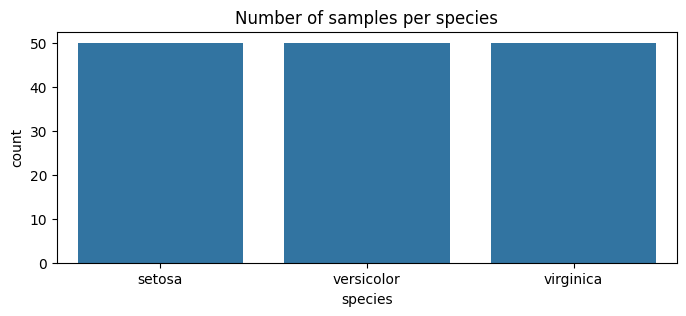

Text(0.5, 1.02, 'Pairplot of Iris features')

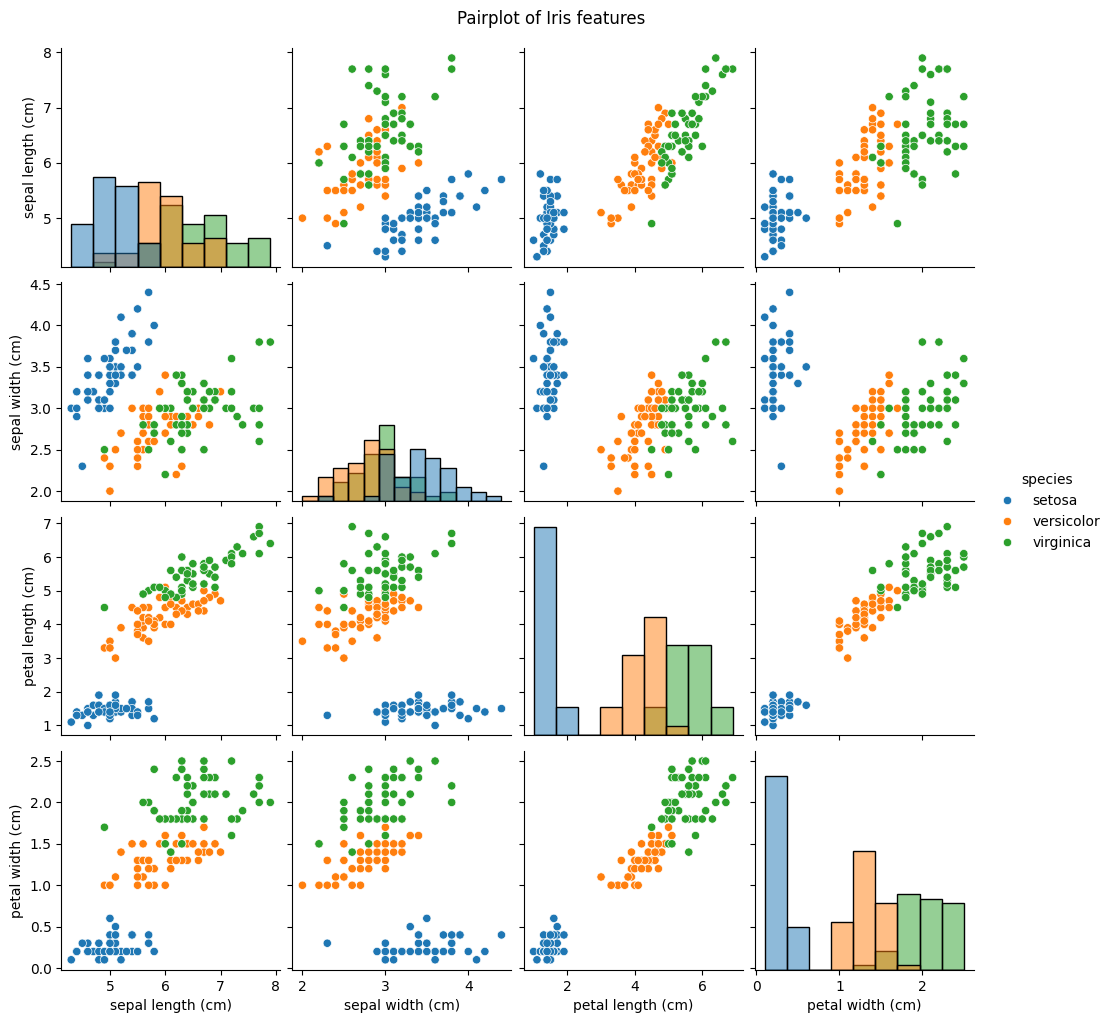

In [ ]:
# 3) Basic EDA: pairplot and class counts
plt.figure(figsize=(8, 3))
sns.countplot(x=y_named)
# countplot shows class balance (Iris is balanced: 50 each).
plt.title("Number of samples per species")
plt.show()

# Pairplot to visualize feature relationships colored by species
sns.pairplot(pd.concat([X, y_named], axis=1), hue="species", diag_kind="hist")
# pairplot helps you visually see which features separate classes
plt.suptitle("Pairplot of Iris features", y=1.02)


In [ ]:
# 4) Train-test split
# We will reserve 20% for testing; set random_state for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])


Train samples: 120 Test samples: 30


In [ ]:
# 5) Feature scaling for KNN
# Decision Trees don't need scaling, KNN does (distance-based)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train, transform train
X_test_scaled = scaler.transform(X_test)         # transform test with same scaler

In [ ]:
# 6) Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=None)  # start with default depth
dt.fit(X_train, y_train)

# 7) Predict & evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))


Decision Tree Accuracy: 0.9333333333333333

Classification Report (Decision Tree):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



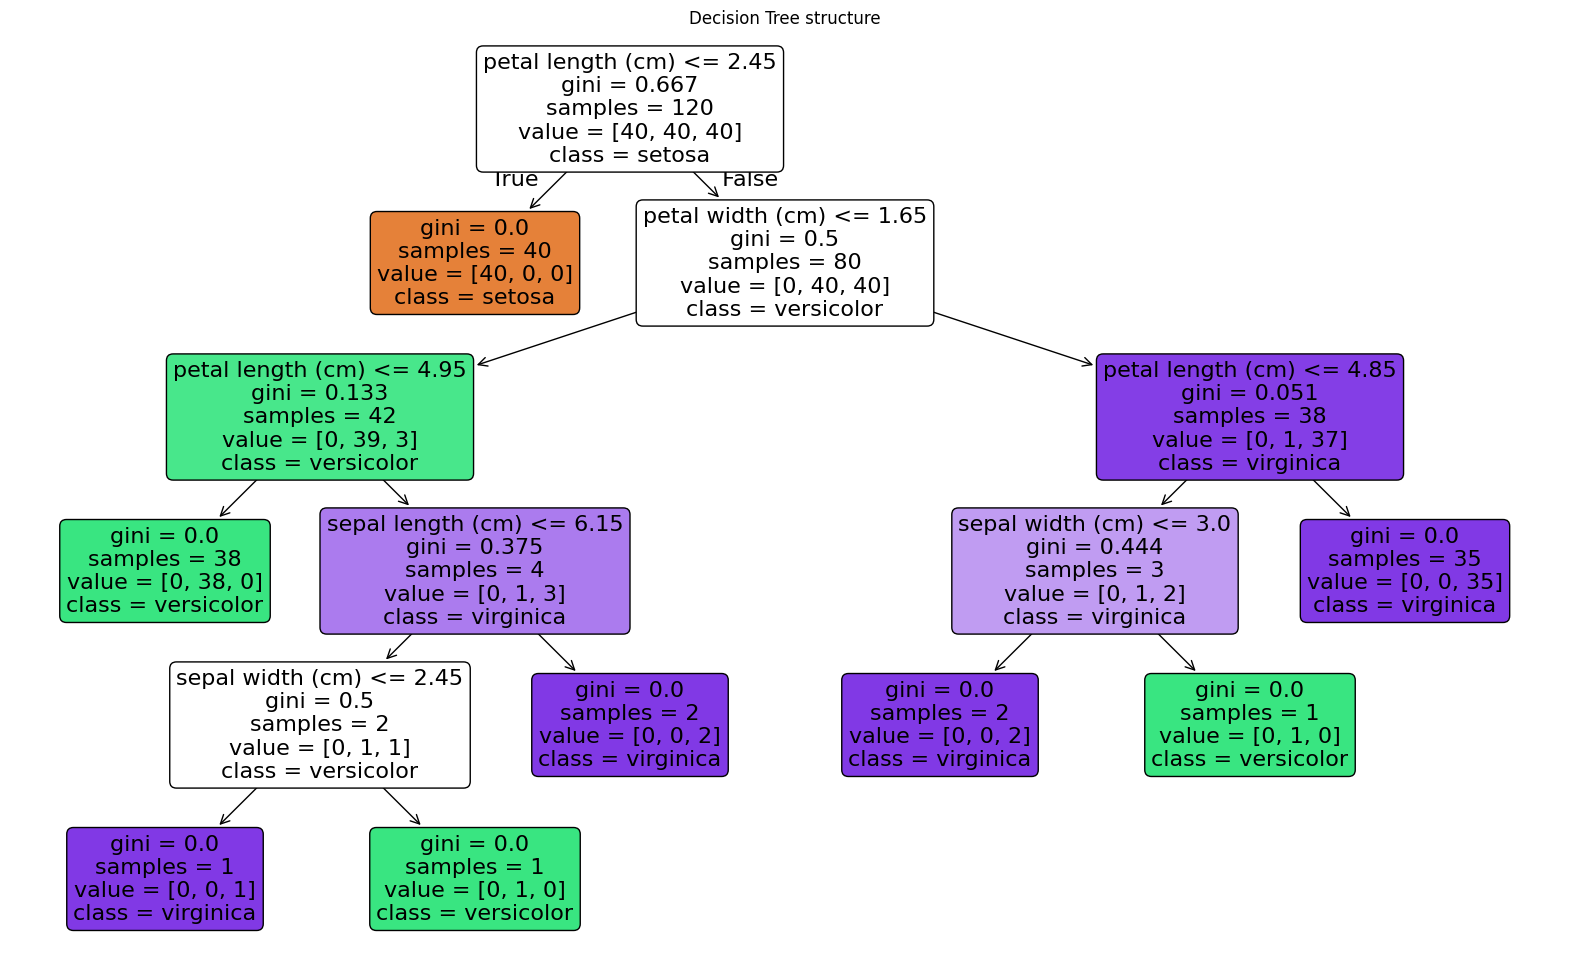

In [ ]:
# 8) Visualize Decision Tree (simple plot)
plt.figure(figsize=(20,12))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree structure")
plt.show()


In [ ]:
# 9) Train K-Nearest Neighbors (KNN)
# We'll try k = 3 as a start
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict & evaluate KNN
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN (k=3) Accuracy:", acc_knn)
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn, target_names=iris.target_names))


KNN (k=3) Accuracy: 0.9333333333333333

Classification Report (KNN):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



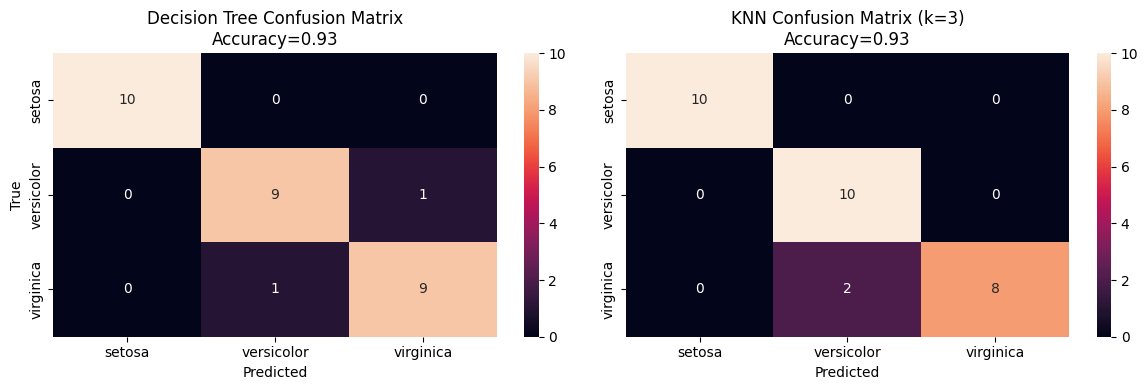

In [ ]:
# 10) Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.heatmap(cm_dt, annot=True, fmt='d', ax=axes[0],
            xticklabels=iris.target_names, yticklabels=iris.target_names)
axes[0].set_title(f"Decision Tree Confusion Matrix\nAccuracy={acc_dt:.2f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_knn, annot=True, fmt='d', ax=axes[1],
            xticklabels=iris.target_names, yticklabels=iris.target_names)
axes[1].set_title(f"KNN Confusion Matrix (k=3)\nAccuracy={acc_knn:.2f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
# 11) Cross-validation for more robust estimate (optional)
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5, scoring='accuracy')
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), scaler.fit_transform(X), y, cv=5, scoring='accuracy')

print("Decision Tree CV accuracy (5-fold):", np.round(dt_cv_scores, 3), "mean:", dt_cv_scores.mean())
print("KNN CV accuracy (5-fold):", np.round(knn_cv_scores, 3), "mean:", knn_cv_scores.mean())


Decision Tree CV accuracy (5-fold): [0.967 0.967 0.9   0.933 1.   ] mean: 0.9533333333333334
KNN CV accuracy (5-fold): [0.967 0.967 0.933 0.9   1.   ] mean: 0.9533333333333334


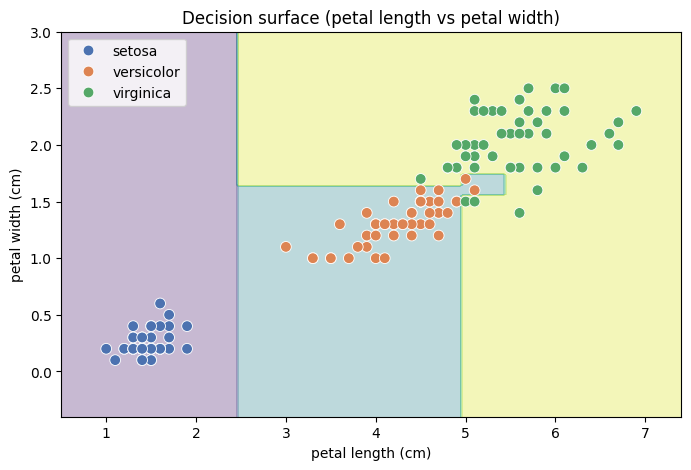

In [ ]:
# 12) (Optional) Decision boundary visualization using two features (petal length & petal width)
# This only visualizes a 2D projection to get intuition.
feat_idx = [2, 3]  # petal length, petal width
X2 = X.iloc[:, feat_idx].values
y2 = y.values

# train simple decision tree on 2 features for plotting
dt2 = DecisionTreeClassifier(random_state=42).fit(X2, y2)

# create mesh
x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = dt2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=[label_map[c] for c in y2], palette='deep', s=60)
plt.xlabel(iris.feature_names[feat_idx[0]])
plt.ylabel(iris.feature_names[feat_idx[1]])
plt.title("Decision surface (petal length vs petal width)")
plt.show()


# **Spam Email Classifier (NLP Basics)**

**Concepts learned:**

1.   Text preprocessing
2.   TF-IDF / Bag of Words (Term Frequency – Inverse Document Frequency)
3. Logistic Regression / Naive Bayes

SMS Spam Collection dataset (short, clean) and build two models:
  Multinomial Naive Bayes (simple & great for text),
  Logistic Regression (strong baseline)
[ChatGPT](https://https://chatgpt.com/share/69258035-950c-8001-b0e6-72bd46a0f6f6)

In [ ]:
# Data + numeric
import pandas as pd        # tabular data (DataFrame)
import numpy as np         # numeric arrays

# Text processing
import re                  # regex for cleaning text
import string              # punctuation list

# Sklearn: models, splitting, metrics, vectorizers
from sklearn.model_selection import train_test_split, cross_val_score

# transform raw text into numeric vectors (Bag-of-Words and TF-IDF).
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classification algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional: for nicer plots of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Download dataset (TSV: label \t text)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

# Quick look
print("rows:", df.shape[0])
df.head()


rows: 5572


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# 3) Inspect & clean basic issues

# Check label distribution (class balance)
print(df['label'].value_counts())
# value_counts() shows whether dataset is balanced.

# Convert labels to binary: ham -> 0, spam -> 1 (makes modeling easier)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Drop any exact duplicates (optional)
df = df.drop_duplicates(subset='text').reset_index(drop=True)


label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# Text cleaning function (simple preprocessing)

import nltk
# nltk.download('stopwords')            # one-time; comment out after run if repeated
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove urls, email-like tokens (not common in SMS but good practice)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # 3. Remove digits (optional) and punctuation
    text = re.sub('\\s+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4. Remove extra whitespace
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    # 5. Remove stopwords (optional)
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

# Apply cleaning to the DataFrame (creates a new column)
df['clean_text'] = df['text'].apply(clean_text)

# Show cleaned sample
df[['text','clean_text']].head(6)


# Lowercasing simplifies vocabulary (Hello vs hello).
# Removing URLs/emails/numbers/punctuation reduces noise.
# stopwords (like 'the', 'is') often add little value for spam detection, so we drop them

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-455843730.py:19: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 weeks word back id like ...


In [ ]:
# Split into training and test sets

X = df['clean_text']        # input texts
y = df['label_num']         # 0 or 1

# 80% train, 20% test; stratify ensures similar spam/ham ratio in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# stratify=y keeps class proportions the same across train and test (important for imbalanced data).

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 4135 Test size: 1034


In [ ]:
# Convert text → numbers (Bag-of-Words & TF-IDF)

# Bag of Words (CountVectorizer)

# CountVectorizer creates a sparse matrix with counts of tokens (Bag-of-Words)

# count_vect = CountVectorizer(ngram_range=(1,2), min_df=2)
# # ngram_range=(1,2): unigrams + bigrams often help catch short spam phrases
# # min_df=2: ignore tokens that appear in fewer than 2 documents (reduce noise)

# X_train_counts = count_vect.fit_transform(X_train)   # learn vocab from train, transform train
# X_test_counts = count_vect.transform(X_test)         # transform test using same vocab


# OR**
# TF-IDF

# TfidfVectorizer scales counts by inverse document frequency — gives lower weight to very common words across all messages.

tfidf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# fit_transform learns the vocabulary from training data and transforms text to numeric vectors; transform reuses that vocabulary on test data.

In [ ]:
# 7) Train Multinomial Naive Bayes (text-friendly)


# nb = MultinomialNB(alpha=1.0)     # alpha=1.0 -> Laplace smoothing
# nb.fit(X_train_counts, y_train)

# # Predict on test set (Counts)
# y_pred_nb = nb.predict(X_test_counts)

# print("NB Accuracy (Counts):", accuracy_score(y_test, y_pred_nb))
# print("\nClassification Report (NB):\n", classification_report(y_test, y_pred_nb))

# MultinomialNB models word counts per class; it’s fast and often strong for text classification.
# alpha is smoothing to avoid zero probabilities for unseen tokens.

# ***OR***


nb_tfidf = MultinomialNB(alpha=1.0)
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
print("NB Accuracy (TF-IDF):", accuracy_score(y_test, y_pred_nb_tfidf))


NB Accuracy (TF-IDF): 0.9680851063829787


In [ ]:
# Train Logistic Regression

lr = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear suits small datasets
lr.fit(X_train_tfidf, y_train)   # often use TF-IDF with LR

y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (LR):\n", classification_report(y_test, y_pred_lr))

# LogisticRegression is a discriminative model that often outperforms Naive Bayes on well-featured text (TF-IDF).

# max_iter increased to ensure convergence.


Logistic Regression Accuracy: 0.9535783365570599

Classification Report (LR):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       903
           1       0.95      0.67      0.79       131

    accuracy                           0.95      1034
   macro avg       0.95      0.83      0.88      1034
weighted avg       0.95      0.95      0.95      1034



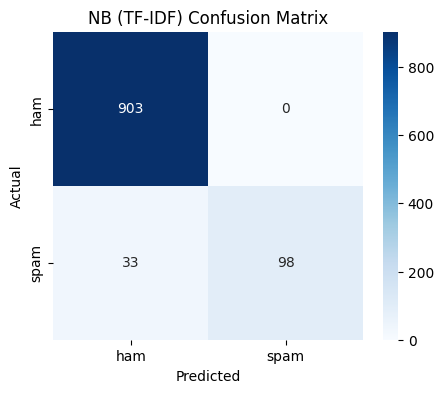

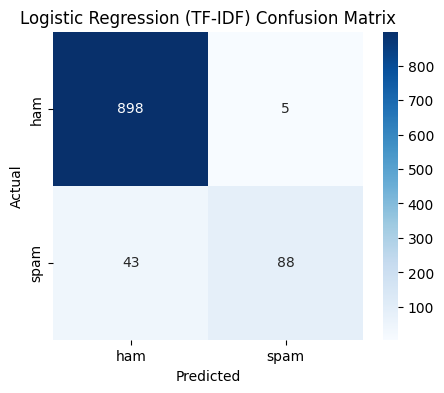

In [ ]:
# Confusion Matrix (visualize errors)

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham','spam'], yticklabels=['ham','spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion(y_test, y_pred_nb_tfidf, "NB (TF-IDF) Confusion Matrix")
plot_confusion(y_test, y_pred_lr, "Logistic Regression (TF-IDF) Confusion Matrix")


In [ ]:
# Cross-validation

# Use TF-IDF + Logistic Regression as an example
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), min_df=2)),
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear'))
])

cv_scores = cross_val_score(pipe, df['clean_text'], df['label_num'], cv=5, scoring='accuracy')
print("5-fold CV accuracy:", np.round(cv_scores, 3), "mean:", cv_scores.mean())

# Pipeline ties vectorizer + model so cross-val includes both steps properly.
# cross_val_score gives stability across different splits.

5-fold CV accuracy: [0.967 0.95  0.957 0.955 0.956] mean: 0.9570515353115093


In [ ]:
# Quick error analysis — view misclassified examples


mis_idx = np.where(y_test != y_pred_lr)[0]
sample_mis = X_test.reset_index(drop=True).iloc[mis_idx][:10]   # first 10 misclassified
y_true = y_test.reset_index(drop=True).iloc[mis_idx][:10]
y_pred_sample = pd.Series(y_pred_lr).iloc[mis_idx][:10]

pd.DataFrame({'text': sample_mis.values, 'true': y_true.values, 'pred': y_pred_sample.values})

,text,true,pred
0,thanks vote sing along stars karaoke mobile fr...,1,0
1,want explicit sex 30 secs ring 02073162414 cos...,1,0
2,recieve tone within next 24hrs terms condition...,1,0
3,todays vodafone numbers ending 4882 selected r...,1,0
4,send logo 2 ur lover 2 names joined heart txt ...,1,0
5,well done 4 costa del sol holiday £5000 await ...,1,0
6,congrats 1 year special cinema pass 2 call 090...,1,0
7,hi babe jordan r u im home abroad lonely text ...,1,0
8,smsservices yourinclusive text credits pls got...,1,0
9,8007 25p 4 alfie moons children need song ur m...,1,0


# **Handwritten Digit Recognition (Intro to Neural Networks)**

**Concepts learned:**

1.   Feed-forward neural networks
2.   Softmax classifier
3.   MNIST dataset



In [ ]:
# Core libs
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras (Colab has TensorFlow preinstalled)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
# tensorflow.keras is a high-level deep learning API

# For evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
# If you want to use GPU on Colab: Runtime -> Change runtime type -> GPU
tf.config.list_physical_devices('GPU')


[]

In [ ]:
# Load MNIST dataset MNIST is the perfect first deep-learning project: small, visual,

# MNIST is built into Keras datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)
print("x_test shape:", x_test.shape)     # (10000, 28, 28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)


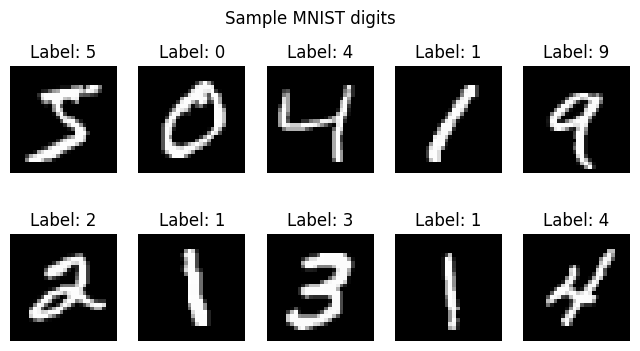

In [ ]:
# Visualize a few digits

plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST digits")
plt.show()


In [ ]:
# Preprocess input (normalize + reshape for MLP)

# Normalize pixel values to [0,1] for better and faster training
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Flatten images for a feed-forward network (MLP)
# MLP expects shape (batch_size, features). 28*28 = 784 features.
x_train_flat = x_train.reshape((-1, 28*28))
x_test_flat  = x_test.reshape((-1, 28*28))

print("x_train_flat shape:", x_train_flat.shape)  # (60000, 784)


# Neural networks train faster with inputs in 0–1 range.

# MLP uses 1-D feature vectors, so we flatten 28×28 into 784 features.

x_train_flat shape: (60000, 784)


In [ ]:
# Build a simple Feed-Forward Neural Network (MLP)

# Define a small MLP
mlp = models.Sequential([
    layers.Input(shape=(784,)),           # input layer (feature vector)
    layers.Dense(128, activation='relu'),# hidden layer with 128 neurons + ReLU activation
    layers.Dense(64, activation='relu'), # another hidden layer
    layers.Dense(10, activation='softmax') # output layer: 10 neurons (one per digit), softmax gives probabilities
])

mlp.summary()

#  Layersss


# Dense = fully connected layer. Each neuron computes a weighted sum of inputs plus bias, then an activation.

# relu (Rectified Linear Unit) activation: max(0, x) — fast and avoids vanishing gradients.

# Final layer uses softmax to output a probability distribution over 10 classes (digits 0–9). Softmax ensures outputs sum to 1 and are interpretable as class probabilities.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile MLP model (loss, optimizer, metrics)

mlp.compile(
    optimizer='adam',                     # Adam optimizer: adaptive, commonly used
    loss='sparse_categorical_crossentropy', # loss for integer labels (0..9)
    metrics=['accuracy']                  # track accuracy during training
)

# optimizer='adam': good default optimizer that adapts learning rates.

# sparse_categorical_crossentropy (integer labels ) It computes cross-entropy between true labels and predicted probabilities

In [ ]:
# Train the MLP

history = mlp.fit(
    x_train_flat, y_train,
    validation_split=0.1,  # keep 10% of training data for validation
    epochs=10,
    batch_size=128,
    verbose=2
)


Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.9005 - loss: 0.3527 - val_accuracy: 0.9595 - val_loss: 0.1450
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.9580 - loss: 0.1429 - val_accuracy: 0.9717 - val_loss: 0.1003
Epoch 3/10
422/422 - 3s - 8ms/step - accuracy: 0.9701 - loss: 0.0983 - val_accuracy: 0.9755 - val_loss: 0.0825
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9776 - loss: 0.0739 - val_accuracy: 0.9750 - val_loss: 0.0802
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9826 - loss: 0.0578 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.9855 - loss: 0.0467 - val_accuracy: 0.9807 - val_loss: 0.0725
Epoch 7/10
422/422 - 2s - 6ms/step - accuracy: 0.9893 - loss: 0.0357 - val_accuracy: 0.9743 - val_loss: 0.0870
Epoch 8/10
422/422 - 3s - 8ms/step - accuracy: 0.9912 - loss: 0.0295 - val_accuracy: 0.9812 - val_loss: 0.0781
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9790 - val_loss: 0.0855


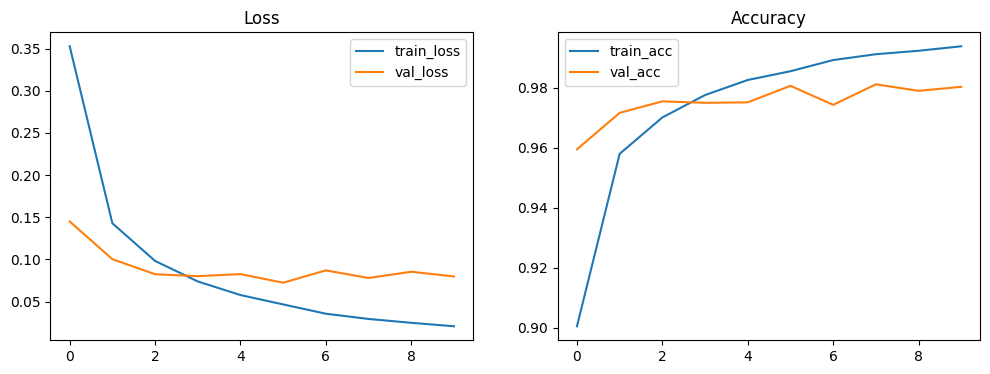

In [ ]:
# Plot training curves (loss & accuracy)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')

plt.show()


In [ ]:
# Evaluate on test set

test_loss, test_acc = mlp.evaluate(x_test_flat, y_test, verbose=0)
print(f"MLP Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


MLP Test accuracy: 0.9769, Test loss: 0.0821


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


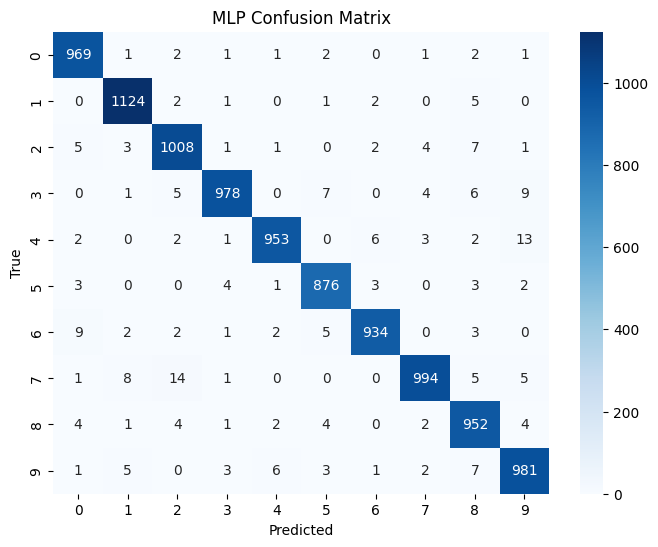

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Predictions & confusion matrix

y_pred_probs = mlp.predict(x_test_flat)        # shape (10000,10)
y_pred = np.argmax(y_pred_probs, axis=1)       # class with highest probability

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.title('MLP Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

# argmax picks the predicted digit (highest softmax probability).

# Confusion matrix and classification report show which digits are confused

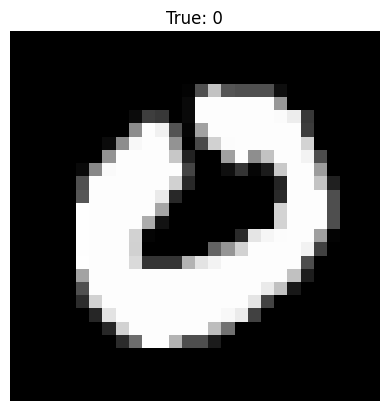

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: 8
Probabilities: [0.064 0.052 0.098 0.028 0.11  0.182 0.075 0.071 0.236 0.084]


In [ ]:
# Predict a single image example

i = 25  # index of test image to inspect
img = x_test[i]
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f"True: {y_test[i]}")
plt.show()

# prepare and predict
img_flat = img.reshape(1, 784).astype('float32') / 255.0
probs = mlp.predict(img_flat)[0]
pred = np.argmax(probs)
print("Predicted:", pred)
print("Probabilities:", np.round(probs, 3))

In [ ]:
# Small Convolutional Neural Network (recommended for better accuracy)
# Convolutional layers are much better for images because they learn spatial patterns (strokes, edges).

# Prepare images with channel dimension

# add channels dimension (batch, height, width, channels)
x_train_cnn = x_train.reshape((-1,28,28,1))
x_test_cnn  = x_test.reshape((-1,28,28,1))

In [ ]:
# Build a tiny CNN

cnn = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN

history_cnn = cnn.fit(
    x_train_cnn, y_train,
    validation_split=0.1,
    epochs=6,       # fewer epochs are often enough for MNIST
    batch_size=128,
    verbose=2
)

Epoch 1/6
422/422 - 48s - 114ms/step - accuracy: 0.9235 - loss: 0.2591 - val_accuracy: 0.9767 - val_loss: 0.0841
Epoch 2/6
422/422 - 82s - 194ms/step - accuracy: 0.9769 - loss: 0.0738 - val_accuracy: 0.9833 - val_loss: 0.0637
Epoch 3/6
422/422 - 40s - 96ms/step - accuracy: 0.9838 - loss: 0.0513 - val_accuracy: 0.9877 - val_loss: 0.0443
Epoch 4/6
422/422 - 41s - 97ms/step - accuracy: 0.9882 - loss: 0.0388 - val_accuracy: 0.9867 - val_loss: 0.0477
Epoch 5/6
422/422 - 42s - 100ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9895 - val_loss: 0.0393
Epoch 6/6
422/422 - 43s - 102ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9877 - val_loss: 0.0407


In [ ]:
# Evaluate CNN

test_loss_cnn, test_acc_cnn = cnn.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test accuracy: {test_acc_cnn:.4f}")


CNN Test accuracy: 0.9898


In [ ]:
# Saving & loading model
# Save

mlp.save('mnist_mlp.h5')
cnn.save('mnist_cnn.h5')

In [ ]:
# ***UPDATED***
# model.save("mnist_model.keras")

# from tensorflow.keras.models import load_model

# model = load_model("mnist_model.keras")
